In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
%matplotlib inline

In [3]:
smile = pd.read_csv('../data/smile_clean.csv')

C:\Users\tomle\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14,15,31,37,43,47,58,71,83,86) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


1. Who has Smile On been serving (number of patients, age, gender, etc.)?

In [4]:
smile_groupby_patient = smile.groupby('patient_id')

In [5]:
#What's with this -1 value?
smile['patient_id'].value_counts()

-1          63
 3212379    54
 2441776    43
 2758373    42
 2431132    37
            ..
 3760121     1
 4430838     1
 3041278     1
 2752531     1
 2764490     1
Name: patient_id, Length: 10711, dtype: int64

In [6]:
smile.iloc[:,~smile.columns.duplicated()]

,Unnamed: 0,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,patient_id,PhoneWorkerNum,CityName,CountyName,...,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Verification of Eligibility - Transportation Arranged,Verification of Eligibility - Verification of Eligibility
0,0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,93115188,SMILE ON 60+ Registration,9/30/2021 16:53,9/30/2021 16:53,0,4431194,123747,Nashville,Davidson,...,NaN,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN
2,2,93115081,SMILE ON 60+ Clinical,9/30/2021 16:50,9/30/2021 16:51,1,2941341,161979,Memphis,Shelby,...,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,No,Yes,No,NaN,NaN
3,3,93115032,SMILE ON 60+ Clinical,9/30/2021 16:48,9/30/2021 16:49,1,3823933,161979,Memphis,Shelby,...,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,No,Yes,No,NaN,NaN
4,4,93114968,SMILE ON 60+ Clinical,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,Memphis,Shelby,...,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,No,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,57855,55627514,SMILE ON 60+ Clinical,8/1/2018 8:00,8/1/2018 8:08,8,2385621,118821,Lascassas,Rutherford,...,NaN,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,NaN,NaN,NaN,NaN
57856,57856,67251452,SMILE ON 60+ Clinical,5/31/2018 8:27,5/31/2018 8:29,2,2631417,131347,Kingsport,Sullivan,...,NaN,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,No,No,Yes,NaN,NaN
57857,57857,53192452,SMILE ON 60+ Registration,5/23/2018 14:11,5/23/2018 14:11,0,-1,60132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,57858,67915561,SMILE ON 60+ Registration,5/15/2018 9:06,5/15/2018 9:10,4,3239813,128174,Memphis,Shelby,...,NaN,NaN,NaN,Church Health Center - Memphis,Provider Site,NaN,NaN,NaN,NaN,NaN


In [7]:
#Dropping the "What is the next step for the clients" columns as they are duplicated and dtale wont import with them. 
smile = smile.drop(smile.columns[[104, 105]], axis=1)
smile.head(1)

,Unnamed: 0,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,patient_id,PhoneWorkerNum,CityName,CountyName,...,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Verification of Eligibility - Transportation Arranged,Verification of Eligibility - Verification of Eligibility
0,0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#importing dtale
import dtale
d = dtale.show(smile)
#open in browser
d.open_browser()

2021-11-16 20:18:08,264 - INFO     - NumExpr defaulting to 4 threads.


In [9]:
#Filter for duplicate patient id
duplicates = smile.duplicated(['patient_id'], keep='first')
smile = smile[~duplicates]
if isinstance(smile, (pd.DatetimeIndex, pd.MultiIndex)):
	smile = smile.to_frame(index=False)

#Delete the negative patient ids

In [10]:
smile = smile[smile.patient_id != -1]

In [11]:
smile = smile[smile.patient_id != -2]

In [12]:
smile = smile.drop(columns = ['Unnamed: 0'])

In [13]:
smile.shape

(10709, 122)

#Get calls by county

Text(0, 0.5, 'Number of Patients')

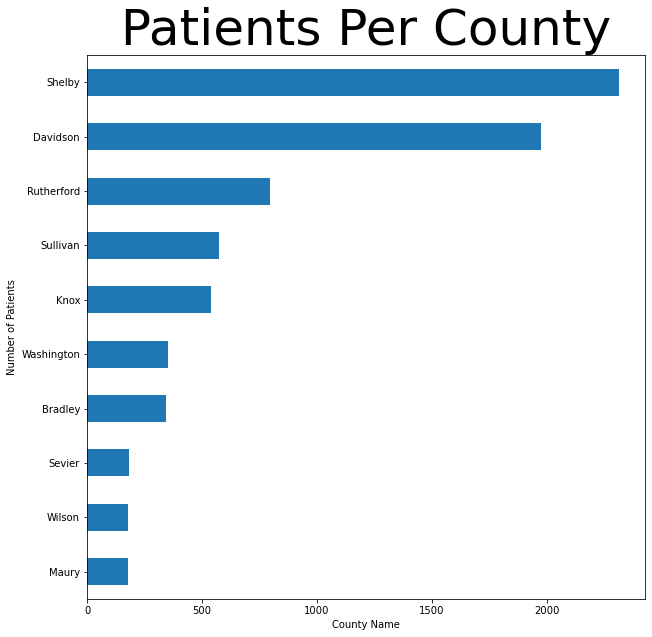

In [43]:
smile.CountyName.value_counts().nlargest(10).sort_values().plot.barh( figsize = (10, 10))
plt.title('Patients Per County', fontsize =50) 
plt.xlabel('County Name')
plt.ylabel('Number of Patients')


#Create smaller df of columns I need. 

In [28]:
smile = smile.rename(columns={smile.columns[83]: 'transportation', smile.columns[92]: 'hear', smile.columns[102]: 'insurance',smile.columns[103]: 'pre_qualify'})

In [34]:
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
smile.head(20)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,patient_id,PhoneWorkerNum,CityName,CountyName,PostalCode,EnteredByWorkerNum,EnteredOn,ReferralsMade,Demographic Information - # of People in Household,Birth Year,Demographic Information - Other Language,1351,1354,2140,2150,2160,2161,230,2330,2331,2332,2335,2390,2391,2392,2393,2394,2915,2920,2933,2940,2950,2954,2955,2980,3220,4341,4342,6930,6980,7111,7140,7210,7220,7230,7240,7241,7250,7261,7286,7310,7311,7320,7321,7410,7411,7413,7414,7471,7510,7970 - Maxillary Quantity,7971,7972,9110,9951,Lab Assist narrative,Screening - Last Screening Date,Verification of Eligibility - Verification Date,Base-line Oral and Conditions Questions - Are you limited in what you can eat?,Base-line Oral and Conditions Questions - Dental Clinic,Base-line Oral and Conditions Questions - Did the client commit to referral?,Base-line Oral and Conditions Questions - Did you help in these other areas?,Base-line Oral and Conditions Questions - Do you need help in these other areas?,Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?,Base-line Oral and Conditions Questions - What is the next step for client encounter?,Base-line Oral and Conditions Questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,transportation,Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),Case Management Information - What is the outcome for the client?,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,Demographic Information - Gender,Demographic Information - Household Income Level,hear,Demographic Information - Preferred Language/Language Needed,Demographic Information - Race/Ethnicity,Demographic Information - What other assistance programs are you on?,Demographic Information - When is the last time you visited your dentist?,Action: Upload After Picture on Finish Tab,Is the treatment plan completed?,Was a treatment plan developed?,"Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",What care was provided to the enrollee? (Select all that apply),insurance,pre_qualify,Screening - # of Lower Natural Teeth,Screening - # of Upper Natural Teeth,Screening - Do you have removable dentures?,Screening - Do you usually wear your denture(s) when you eat?,Screening - Experienced any problems related to mouth/teeth during past 12 months?,Screening - How often do you brush your teeth?,Screening - Need for Periodontal Care,Screening - Root Fragments,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Verification of Eligibility - Transportation Arranged,Verification of Eligibility - Verification of Eligibility
0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,37167.0,123747,9/30/2021 16:57,NaN,1,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Interfaith Dental Clinic - Murfreesboro,Yes,NaN,No,Yes,Poor,NaN,Referre

Text(0, 0.5, 'Number of Calls')

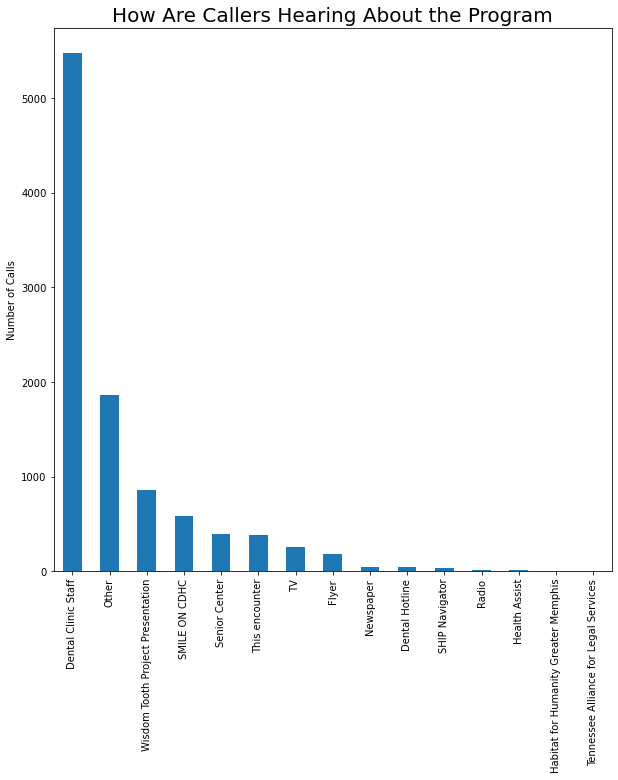

In [45]:
smile.hear.value_counts().plot.bar( figsize = (10, 10))
plt.title('How Are Callers Hearing About the Program', fontsize = 20)
plt.ylabel('Number of Calls')

In [39]:
#importing dtale
import dtale
d = dtale.show(smile)
#open in browser
d.open_browser()